---

Read Me

---

SETUP:
Ensure google drive has enough space (at least 12 GBs);
It is recommended to make a new account to have a fresh drive

Mount the Drive to the environment (using the icon in the colab explorer sidebar)

To install necessary resources, run the imports section, it will import automatically

For the first time running the program, run the first section (Import the Dataset).  This section only needs to be run once, as it loads the images into the google drive for training.

Then, run the convert dataset to npy for whatever data you would like to train on.

After this is done, the train.ipynb file can be run to acquire results

Note: the Convert the Dataset section in get_data and the Build the Model section in train are meant to be adjusted to optimize the model. 

# Summary

Authors: Casey, D., Gallardo, N., Lindauer, S.R.

Project: Galaxy Zoo

This file starts by importing the dataset from kaggle.com. It saves all the zip files to the mounted google drive, and extracts everything before deleting the zip files. The import the dataset cell only ever needs to be run once.

Next, you decide how big of a training set you want to train on by setting data_size, and run the cell below to transform that amount of data and saves into numpy files to be trained on later. This data preparation process is long, so saving the processed data to numpy files speeds up testing. The conver the dataset cells can be run as many times as you need different sized datasets.

In [ ]:
#Only run this once at start up
%cd drive/MyDrive/Colab Notebooks/data
!pwd

/content/drive/MyDrive/Colab Notebooks/data
/content/drive/MyDrive/Colab Notebooks/data


# Import the Dataset

In [ ]:
import os # library that helps us do file path stuff
kaggle_key = '{"username":"roselindauer","key":"503107310d2201493855f4ad82820397"}' # allows us to download the data

# If the kaggle hidden folder isn't there, make it
if not os.path.isdir('/root/.kaggle'):
  os.mkdir('/root/.kaggle')

# write the kaggle credentials to the hidden folder
with open('/root/.kaggle/kaggle.json', 'w') as f:
  f.write(kaggle_key)

# Import kaggle
import kaggle

# Download the data
!kaggle competitions download -c galaxy-zoo-the-galaxy-challenge # Fetch it
!sudo apt-get install unzip # install the unzip command 
!unzip galaxy-zoo-the-galaxy-challenge.zip # unzip the data to the data directory
!ls
!unzip all_ones_benchmark.zip # unzip everything
!unzip all_zeros_benchmark.zip 
!unzip central_pixel_benchmark.zip 
!unzip images_test_rev1.zip 
!unzip training_solutions_rev1.zip 
!unzip images_training_rev1.zip 
!rm *.zip # remove the zip files
!ls images_test_rev1 | wc -l # number of test images
!ls images_training_rev1 | wc -l # number of training images

Streaming output truncated to the last 5000 lines.
  inflating: images_training_rev1/417033.jpg  
  inflating: images_training_rev1/417034.jpg  
  inflating: images_training_rev1/417039.jpg  
  inflating: images_training_rev1/417040.jpg  
  inflating: images_training_rev1/417063.jpg  
  inflating: images_training_rev1/417078.jpg  
  inflating: images_training_rev1/417103.jpg  
  inflating: images_training_rev1/417105.jpg  
  inflating: images_training_rev1/417130.jpg  
  inflating: images_training_rev1/417168.jpg  
  inflating: images_training_rev1/417171.jpg  
  inflating: images_training_rev1/417182.jpg  
  inflating: images_training_rev1/417208.jpg  
  inflating: images_training_rev1/417213.jpg  
  inflating: images_training_rev1/417242.jpg  
  inflating: images_training_rev1/417276.jpg  
  inflating: images_training_rev1/417277.jpg  
  inflating: images_training_rev1/417299.jpg  
  inflating: images_training_rev1/417368.jpg  
  inflating: images_training_rev1/417381.jpg  
  inflati

# Convert the Dataset to npy matrices for training

In [ ]:
# SET TRAINING DATA SIZE
data_size = 10000

In [ ]:
import numpy as np
import pandas as pd
import os
import PIL

 # Get Label csv
label_dir = '/content/drive/MyDrive/Colab Notebooks/data/training_solutions_rev1.csv'

# Store labels as numpy. The next two lines are taken from the Kaggle Winner, Sander Dieleman
# See LICENSE_Dieleman in the TiMN5 Github.
d = pd.read_csv(label_dir)
npLabels = d.to_numpy()[:, 1:].astype('float32')

# get the filenames list
%cd /content/drive/MyDrive/Colab Notebooks/data/
filenames = os.listdir('images_training_rev1')
%cd images_training_rev1
images = []

# Parse every image in the dataset to numpy
for i, filename in enumerate(filenames[:data_size]):
    image = PIL.Image.open(filename)
    image_res = image.resize((69, 69)) # Resize from 424x424 to 69x69
    img_np = np.asarray(image_res)
    images.append(img_np)
    if i==0 or i/1000 in [float(x) for x in range(1,60)]:
        print(i)

images_np = np.stack(images, axis=0)
images_np.shape

# Save the labels and images to numpy files
%cd /content/drive/MyDrive/Colab Notebooks/data/
np.save('images_training_{}'.format(data_size), images_np)
np.save('labels_training_{}'.format(data_size), npLabels[0:data_size,:])

/content/drive/MyDrive/Colab Notebooks/data
/content/drive/MyDrive/Colab Notebooks/data/images_training_rev1
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
/content/drive/MyDrive/Colab Notebooks/data


/content/drive/MyDrive/Colab Notebooks/data/images_training_rev1


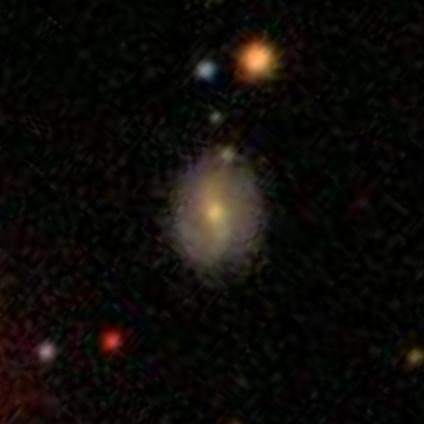

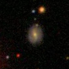

In [ ]:
# Resize validation 
%cd images_training_rev1
imageTest = PIL.Image.open(filenames[0])
display(imageTest)
imageReTest = imageTest.resize((69,69))
display(imageReTest)